In [ ]:
'''cd ~/ngs_institute/data
wget http://spades.bioinf.spbau.ru/students/2a/E.coli/100x.1.fastq.gz ; gunzip 100x.1.fastq.gz
wget http://spades.bioinf.spbau.ru/students/2a/E.coli/100x.2.fastq.gz ; gunzip 100x.2.fastq.gz
bowtie2 -x MG1655-K12_index -1 100x.1.fastq -2 100x.2.fastq -S 100x.sam
samtools flagstat 100x.sam
samtools view -S -b 100x.sam > 100x.bam
samtools sort 100x.bam > 100x.sorted.bam
samtools index 100x.sorted.bam
bamCoverage -b 100x.sorted.bam -bs 1000 -o 100x_1000.sorted.bw --outFileFormat bedgraph
bamCoverage -b 100x.sorted.bam -bs 1 -o 100x.sorted.bw --outFileFormat bedgraph'''

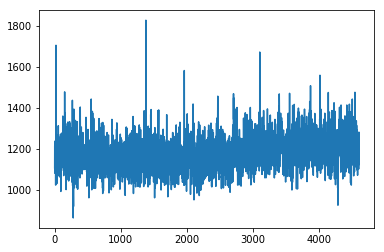

average = 107.49563889612136
coverage = 1.0


In [230]:
import pysam
import pyBigWig
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


bw_1000 = open('/Users/dashabalashova/ngs_institute/data/100x_1000.sorted.bw', 'r')
a = []
for r in bw_1000.read().splitlines():
    a.append(int(r.split('\t')[-1]))


plt.plot(a)
plt.show()

bw = open('/Users/dashabalashova/ngs_institute/data/100x.sorted.bw', 'r')
a = []
for r in bw.read().splitlines():
    a.append(int(r.split('\t')[-1]))

print('average =', np.mean(a))
print('coverage =', (len(a)-a.count(0))/len(a))

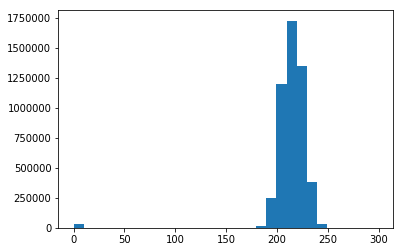

mean =213.99012758962846, sigma =19.979470042856665
confide interval = (174.83108587543245, 253.14916930382446)


In [232]:

bamfile = pysam.AlignmentFile('/Users/dashabalashova/ngs_institute/data/100x.sorted.sam', 'rb')

b=[]
for alignment in bamfile.fetch():
    if abs(alignment.tlen)>=0 and abs(alignment.tlen)<300:
        b.append(abs(alignment.tlen))

    
plt.hist(b,   bins=30)
plt.show()

mean, sigma = np.mean(b), np.std(b)

conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)

print('mean =%s, sigma =%s' %(mean , sigma))
print('confide interval =', conf_int)

In [223]:
import numpy as np
import pandas as pd

a = np.array([[0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0]])

frame = pd.DataFrame(a, index=['A','C','G','T'], columns=['A','C','G','T'])

for alignment in bamfile.fetch():
    if (str(alignment).split()[5])!='None':
        #print(alignment.get_aligned_pairs(matches_only=True, with_seq=True))
        #print(alignment.query_sequence)
        #print(alignment.get_reference_sequence())
        f=alignment.get_aligned_pairs(matches_only=True, with_seq=True)
        for n in range(0,len(f)):
            if f[n][2]=='c':
                u=alignment.query_alignment_sequence[f[n][0]]
                if u in ['A','C','G','T']:                 
                    frame['C'][u]+=1
            if f[n][2]=='a':
                u=alignment.query_alignment_sequence[f[n][0]]
                if u in ['A','C','G','T']:
                    frame['A'][u]+=1
            if f[n][2]=='t':
                u=alignment.query_alignment_sequence[f[n][0]]
                if u in ['A','C','G','T']:
                    frame['T'][u]+=1
            if f[n][2]=='g':
                u=alignment.query_alignment_sequence[f[n][0]]
                if u in ['A','C','G','T']:                
                    frame['G'][u]+=1

        
print(frame)

         A       C       G        T
A        0  547886  356067   330422
C  1103106       0  630990   752650
G   757057  630877       0  1100735
T   328867  350930  548661        0
